# **PPE Detection Using Yolov7**

Since its inception, the YOLO family of object detection models has come a long way. YOLOv7 is the most recent addition to this famous anchor-based single-shot family of object detectors. It comes with a bunch of improvements which include state-of-the-art accuracy and speed.  In this notebook, we will be fine tuning the YOLOv7 object detection model on a real-world Construction Safety.

Benchmarked on the COCO dataset, the YOLOv7 tiny model achieves more than 35% mAP and the YOLOv7 (normal) model achieves more than 51% mAP. It is also equally important that we get good results when fine tuning such a state-of-the-art model. For that reason, we will be fine tuning YOLOv7 on a real-world Construction Safety dataset in this project.

# Step 1: Prepare the Dataset
To get your object detector up and running, you must first collect training photographs. You should think carefully about the activity you are attempting to complete and plan ahead of time for the components of the task that your model may find difficult. To improve the accuracy of your final model, I recommend reducing the domain that your model must handle as much as feasible.

For YOLOv7 custom training, we need to develop a dataset. If you don’t have any data, you can use the [openimages](https://storage.googleapis.com/openimages/web/index.html) database.

# Step 2: Annotating the Dataset
Use LabelImg or any annotation tool like [Roboflow](https://roboflow.com/)  to annotate the dataset. Create a file with the same name as the image and the annotation text.

Prepare a set, for example, corresponding to

images_0.jpg
images_0.txt

# Step 3: Split Dataset
After you’ve tagged your data, we’ll divide it into train and test folders. The split ratio will be determined by the user, however the most common split is (80-20) percent, which implies that 80 percent of the data is utilized for training and 20 percent for testing. *The images and labels are stored in the stated folder architecture.

Separate the files into a training and a validation set (and optionally a test set). Final dataset folder looks like below before get into YOLOv7 training,

# ├── dataset
## └── train
#### └── images (folder including all training images) <br>
#### └── labels (folder including all training labels)<br>
## └── test
#### └── images (folder including all testing images)<br>
#### └── labels (folder including all testing labels)<br>
## └── valid
#### └── images (folder including all valid images)<br>
#### └── labels (folder including all valid labels)<br>

In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pwd

In [ ]:
import os
os.chdir('/content/drive/MyDrive/PPE')

In [ ]:
import os
if not os.path.exists("dataset"):
    os.mkdir("dataset")
else:
    print("The 'dataset' directory already exists.")

## Unzip Files
Place your data zip file into the project directory

In [ ]:
!unzip "dataset.zip" -d "dataset"

Remove zip folder


In [ ]:
!rm dataset.zip

# Step 4: Clone the YOLOv7 Repository
The next step is to clone the YOLOv7 repository so that we can access the codebase for training the models.

In [ ]:
!git clone https://github.com/WongKinYiu/yolov7.git       # clone

In [ ]:
# change current path to the yolov7 directory
import os
os.chdir('yolov7')

In [ ]:
!pip install -r requirements.txt      # install modules

# Step 5: Creating the Dataset YAML File
We must now develop a customized configuration file. (Be sure to specify the proper directory), as the training process will be entirely dependent on that file.
Create a file with the name “custom.yaml” in the (yolov7/data) folder. Set the correct path to the dataset folder, alter the number of classes and their names, and then save it.

Make a file that specifies the training configuration. In custom.yaml file, write the following:

* Complete path to dataset train folder
* Complete path to dataset test folder

* Number_of_classes
* Classes_names_array

In [ ]:
# custom.yaml filename
#it should be in yolov7/data
'''
/content/drive/MyDrive/PPE/yolov7/data
train: ../dataset/train/images
val: ../dataset/valid/images
test: ../dataset/test/images

# number of classes
nc: 5

names: ['helmet', 'no-helmet', 'no-vest', 'person', 'vest']
'''

# Step 6: Download pretrained weights

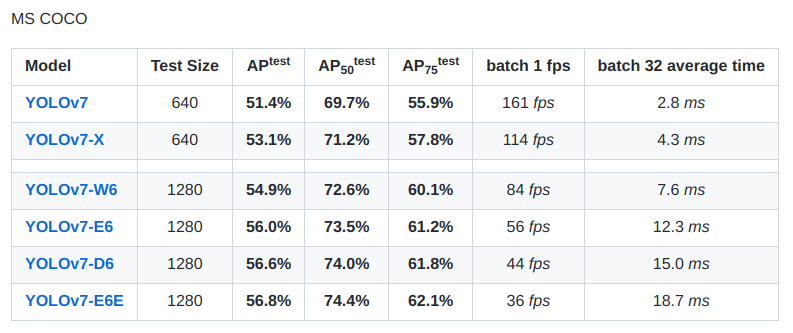

In [ ]:
# Download pretrained weight

! wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt
# ! wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-w6.pt
# ! wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-e6.pt
# ! wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-d6.pt
# ! wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-e6e.pt

# Step 7: Configure YOLOv7.yaml
Next, we need to configure the YOLOv7 model for the detecor training. There are several default configuration files inside yolov7/cfg/training/ directory. All these contain the model configuration. We need to configure the **yolov7.yaml** file. For that, we will create a copy of that file, rename it, and configure it accordingly.

![image-3.png](attachment:image-3.png)

Just change the `nc` parameter of the file as in my case 5 classes

# Step 8: Executing the Training Command
Next, we will execute the command to train the model.
Let’s go over the important flags in the below command:

* **device**: The GPU number (ID) to use for training. As we have only one GPU, so, it is 0.

* **data**: This accepts the path to the dataset YAML file.

* **img**: By default, the images will be resized to 640×640 resolution before being fed to the network. Still, we are providing the image size here.

* **cfg**: This is the path to the model configuration file which is needed for loading the model architecture which we created just before.

* **weights**: This flag accepts the path to the pretrained model.

* **name**: All the training, validation, and test results are saved in subdirectories inside the runs directory by default. We can provide the name of these subdirectories by specifying a string name from this flag.

* **hyp**: All the models in the YOLOv7 family have a different set of parameters and hyperparameters. These include the learning rate, the augmentation techniques, and also the intensity of the augmentations among many other hyperparameters. All these are defined in their hyperparameter files (YAML files) in the yolov7/data directory. Here, we specify the path to the appropriate YOLOv7-tiny model hyperparameter file.

The other flags define the number of epochs to train for, the batch size, and the number of workers. You can set these according to the hardware that you are using. Here, we are training the model for 100 epochs.



In [ ]:
# train p5 models
!python train.py --epochs 50 --workers 8 --device 0 --batch-size 8 --data 'data/custom.yaml' --img 640 640 --cfg 'cfg/training/yolov7_custom.yaml' --weights 'yolov7.pt' --name 'yolov7_trained' --hyp 'data/hyp.scratch.p5.yaml'


## *Continue training from where you left*
Continue training from where you left off, your Model training can be stopped due to multiple reasons, like the notebook time out, notebook craches, due to network issues,  and many more,  so you can start your training from where you left off, by passing the previous trained weights.

In [ ]:
# train p5 models
# uncomment and run the below line if ypur model training is stopped
#!python train.py --epochs 50 --workers 8 --device 0 --batch-size 16 --data 'data/custom.yaml' --img 640 640 --cfg 'cfg/training/yolov7_custom.yaml' --weights 'runs/train/yolov7_trained/weights/best.pt' --name yolov7 --hyp data/hyp.scratch.p5.yaml


Once the training is completed, the best weight is saved at **yolov7/runs/train/yolov7_trained/weights/best.pt**, usually inside the ‘runs’ folder. Once we get the weight file, we can be ready for evaluation and inferencing.



# Step 9: Model Evaluation

The best weight is saved at **yolov7/runs/train/yolov7_trained/weights/best.pt** after the training is finished, generally in the **`runs`** folder. Once we have the weight file, we can begin evaluating and drawing conclusions.


## *F1, Precision, and Recall Curve*

In [ ]:
from IPython.display import Image
display(Image("runs/train/yolov7_trained2/results.png",  width=1200, height=600))

On the validation set, we have a mAP of 0.95 at 0.5 IoU and 0.67 at 0.5:0.95 IoU.

We can also check the precision, recall, mAP using the trained model using the following command.


In [ ]:
!python test.py --data data/custom.yaml --img 640 --batch 16 --conf 0.001 --iou 0.65 --device 0 --weights runs/train/yolov7_trained2/weights/best.pt --name yolov7_test

As we can see, the data reflects a healthy model that achieves at least ~ .91 mAP@.5 efficacy at predicting each of the real labels in the test set.


In [ ]:
# results will be save at this path
"runs/test/yolov7_test"

## *Run the cell below to evaluate on test images.*

In [ ]:
# Run evaluation
!python detect.py --weights runs/train/yolov7_trained2/weights/best.pt --conf 0.5 --source '../dataset/test/images'

To view the inference images, run the below code. This will display the output images one by one.

In [ ]:
# display inference on ALL test images
import glob
from IPython.display import Image, display
i = 0
limit = 10000 # max images to print
for imageName in glob.glob('runs/detect/exp2/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
    i = i + 1

## *Model testing on video*
Once we have entered our parameters for testing, we can call on the detect.py script to detect any of the desired objects in our new test video.

In [ ]:
!python detect.py --weights "runs/train/yolov7_trained/weights/best.pt" --conf 0.25 --img-size 640 --source "test_video.mp4" --name testing_on_video

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import subprocess

# Input video path
save_path = 'runs/detect/testing_on_video/test_video.mp4'

# Compressed video path
compressed_path = "result_compressed.mp4"

# FFmpeg command
ffmpeg_command = ['ffmpeg', '-i', save_path, '-vcodec', 'libx264', compressed_path]

# Execute FFmpeg command
subprocess.run(ffmpeg_command, check=True)

# Read compressed video file
with open(compressed_path, 'rb') as file:
    video_data = file.read()

# Encode video data as base64
video_base64 = b64encode(video_data).decode('utf-8')

# Generate data URL for video
data_url = f"data:video/mp4;base64,{video_base64}"

# Create HTML video tag
video_html = f'<video width=400 controls><source src="{data_url}" type="video/mp4"></video>'

# Display the video in Jupyter Notebook
HTML(video_html)
